<a href="https://colab.research.google.com/github/andrybrew/IHT-SEM1302-30Okt/blob/main/practice_material/sentiment_analysis_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis with IndoBERT**

##**Importing required libraries**

In [1]:
# Install Huggingface Transformers
! pip install huggingface transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

##**Importing Dataset**

In [3]:
# Fetching the dataset from GitHub
data_url = "https://raw.githubusercontent.com/andrybrew/IHT-SEM1302-30Okt/main/data/001_suku-bunga.csv"

# Using pandas read_csv function to load the data from the URL directly into a DataFrame
df_tweet = pd.read_csv(data_url)

##**Loading the IndoBERT Model**

In [5]:
# Download Pretrained Model
pretrained = "mdhugol/indonesia-bert-sentiment-classification"

In [6]:
# Set Model and Tokenizer
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Create sentiment classifier using huggingface pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

##**Performing Sentiment Analysis**

In [7]:
def get_sentiment(text):
    # Tokenize text and truncate to ensure it doesn't exceed the maximum limit
    tokens = tokenizer.tokenize(text)
    tokens = tokens[:min(len(tokens), 512 - 2)]  # 2 tokens for [CLS] and [SEP]

    # Convert tokens back to string
    truncated_text = tokenizer.convert_tokens_to_string(tokens)

    # Get sentiment
    output = sentiment_analysis(truncated_text)[0]
    label = label_index[output['label']]
    score = output['score']
    return label, score

In [8]:
# Set Label
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

In [11]:
# Test with one sentence
text = "Kebijakannya kacau balau"
sentiment, score = get_sentiment(text)
print(f'The sentiment is: {sentiment} with a score of: {score}')

The sentiment is: negative with a score of: 0.997998058795929


##**Applying Sentiment Analysis to Dataframe**

In [12]:
# Get sentiment label for each row in dataframe
df_tweet[['sentiment', 'score']] = df_tweet['text'].apply(lambda x: pd.Series(get_sentiment(x)))

In [13]:
# Show Tweet with sentiment
df_tweet[['text', 'sentiment', 'score']]

,text,sentiment,score
0,Disiplin Fiskal: Rasio utang lebih dari 60% da...,negative,0.617929
1,"BI Kerek Suku Bunga Acuan, Pengusaha Berharap ...",neutral,0.996118
2,[BREAKING] Bank Indonesia menaikkan suku bunga...,neutral,0.997546
3,#EURUSD : Menanti Kebijakan Suku Bunga ECB an...,neutral,0.996434
4,Muncul di browse youtube gua video finfluencer...,negative,0.996976
...,...,...,...
498,Terbaru! Konsensus Ekonom Ramal BI Tahan Suku ...,neutral,0.994376
499,IHSG Diprediksi Sideways Menanti Suku Bunga BI...,neutral,0.995327
500,"Selepas keluar dari Mesir, Bani Israil mendiri...",neutral,0.887508
501,Pagi. Semalam bursa AS ditutup melemah di teng...,neutral,0.996609


<Axes: xlabel='sentiment', ylabel='count'>

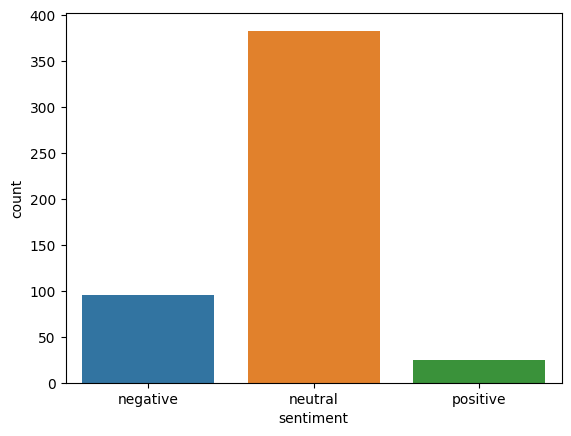

In [14]:
# Visualise the sentiment distribution
sns.countplot(x ='sentiment', data = df_tweet)